## MSDS 7331 Data Mining: Project1

***  

Team: Andrew Abbott, Vivek Bejugama, Patrick McDevitt, Preeti Swaminathan 


In [1]:
#importing Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
import seaborn as sns

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#Import Data from .csv file

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... change directory as needed to point to local data file 
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
df = pd.read_csv('../data/OnlineNewsPopularity.csv')  


# Strip leading spaces and store all the column names to a list
df.columns = df.columns.str.strip()
#col_names = df.columns.values.tolist()




In [3]:
# Summary of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

In [5]:

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... Extract useable elemnts from the string URL
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
df['http'], df['blank'], df['mash'], df['year'], df['month'], df['day'], df['title'], df['extra'] = df['url'].str.split('\/', 7).str

del df['http'],df['blank'],df['mash'],df['extra']

# Derive date column from year-month-day fields
df['year']  = (df['year']).astype(str)
df['month'] = (df['month']).astype(str)
df['day']   = (df['day']).astype(str)
df['publish_date'] = pd.to_datetime(df.year + df.month + df.day, format = "%Y%m%d")

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... Creating day_of_week categorical variable
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
df['day_of_week'] = 'Mon'

tuesday = df['weekday_is_tuesday'] == 1
df.loc[tuesday, 'day_of_week'] = 'Tue'

wednesday = df['weekday_is_wednesday'] == 1
df.loc[wednesday, 'day_of_week'] = 'Wed'

thursday = df['weekday_is_thursday'] == 1
df.loc[thursday, 'day_of_week'] = 'Thu'

friday = df['weekday_is_friday'] == 1
df.loc[friday, 'day_of_week'] = 'Fri'

saturday = df['weekday_is_saturday'] == 1
df.loc[saturday, 'day_of_week'] = 'Sat'

sunday = df['weekday_is_sunday'] == 1
df.loc[sunday, 'day_of_week'] = 'Sun'

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... creating data_channel categorical variable
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
df['data_channel'] = np.NaN

condition = df['data_channel_is_lifestyle'] == 1
df.loc[condition, 'data_channel'] = 'Lifestyle'

condition = df['data_channel_is_entertainment'] == 1
df.loc[condition, 'data_channel'] = 'Entertainment'

condition = df['data_channel_is_bus'] == 1
df.loc[condition, 'data_channel'] = 'Business'

condition = df['data_channel_is_socmed'] == 1
df.loc[condition, 'data_channel'] = 'SocMed'

condition = df['data_channel_is_tech'] == 1
df.loc[condition, 'data_channel'] = 'Tech'

condition = df['data_channel_is_world'] == 1
df.loc[condition, 'data_channel'] = 'World'

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... Popularity Variable . Article is considerd popular if it has more than 1400 shares. 
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df['popularity'] = np.where(df['shares']>1400, True, False)


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39644 entries, 0 to 39643
Data columns (total 36 columns):
n_tokens_title                   39644 non-null int64
n_tokens_content                 39644 non-null int64
num_hrefs                        39644 non-null int64
num_imgs                         39644 non-null int64
num_videos                       39644 non-null int64
num_keywords                     39644 non-null int64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null float64
data_channel_is_socmed           39644 non-null float64
data_channel_is_tech             39644 non-null float64
data_channel_is_world            39644 non-null float64
kw_avg_avg                       39644 non-null float64
self_reference_avg_sharess       39644 non-null float64
weekday_is_monday                39644 non-null float64
weekday_is_tuesday               39644 non-null float64
weekday

After looking at the boxplots of these variables it is evident that many are heavily skewed. Before they are used for prediction a log transformation would be beneficial. The following bit of code makes those transformations, creating new variables.

In [47]:
# ---------------------------------
# Log transform variables with high skewness
# ---------------------------------

log_features = ['n_tokens_content',
 'num_hrefs',
 'num_imgs',
 'num_videos',
 'kw_avg_avg',
 'self_reference_avg_sharess',]

df1 = df

# store min value for each column
df_mins = df1[log_features].min()

for column in log_features:
    sk = df1[column].skew()
    if(sk > 1):
        new_col_name = 'ln_' + column
        print (column, sk, new_col_name)
        if df_mins[column] > 0:
            df1[new_col_name] = np.log(df1[column])
        elif df_mins[column] == 0:
            df_tmp = df1[column] + 1
            df1[new_col_name] = np.log(df_tmp)
        else:
            print('--> Log transform not completed :', column, '!!')

n_tokens_content 2.94542193879 ln_n_tokens_content
num_hrefs 4.0134948282 ln_num_hrefs
num_imgs 3.94659584465 ln_num_imgs
num_videos 7.0195327863 ln_num_videos
kw_avg_avg 5.76017729162 ln_kw_avg_avg
self_reference_avg_sharess 17.9140933777 ln_self_reference_avg_sharess


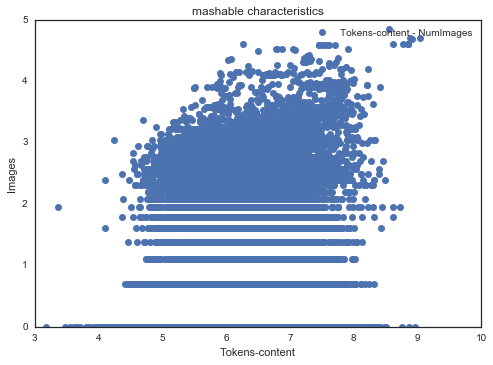

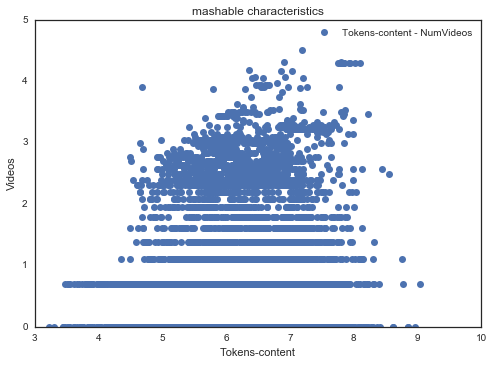

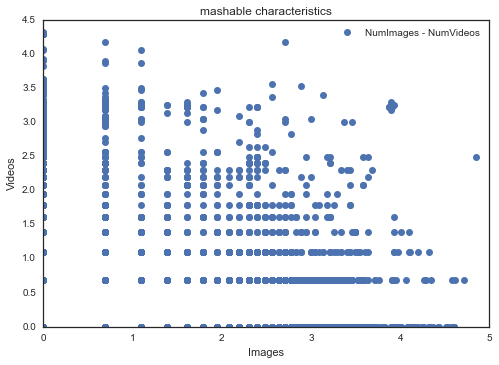

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


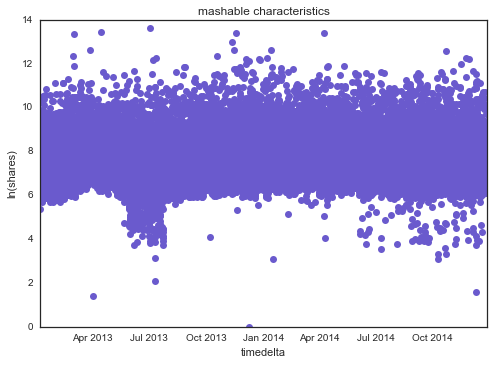

In [15]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... Tokens, Images, Videos plots
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
import numpy as np

df1.log_n_tokens = np.log(df1['n_tokens_content'])
df1.log_n_imgs = np.log(df1['num_imgs'])
df1.log_n_videos = np.log(df1['num_videos'])

plt.plot(df1.log_n_tokens, df1.log_n_imgs, label = 'Tokens-content - NumImages', linestyle = 'None', marker = 'o')
plt.xlabel('Tokens-content')
plt.ylabel('Images')
plt.title('mashable characteristics')
plt.legend()
plt.show()

plt.plot(df1.log_n_tokens, df1.log_n_videos, label = 'Tokens-content - NumVideos', linestyle = 'None', marker = 'o')
plt.xlabel('Tokens-content')
plt.ylabel('Videos')
plt.title('mashable characteristics')
plt.legend()
plt.show()

plt.plot(df1.log_n_imgs, df1.log_n_videos, label = 'NumImages - NumVideos', linestyle = 'None', marker = 'o')
plt.xlabel('Images')
plt.ylabel('Videos')
plt.title('mashable characteristics')
plt.legend()
plt.show()





array([ 6.3851944 ,  6.56667243,  7.31322039,  7.09007684,  6.22455843,
        6.75110147,  6.32076829,  6.79234443,  8.18868912,  6.56526497,
        7.69621264,  7.54960917,  6.7129562 ,  9.21034037,  6.63463336,
        7.37775891,  9.51782507,  8.03915739,  8.64822145,  9.74683374,
        7.9373747 ,  6.39359075,  6.09807428,  7.31322039,  6.74758653,
        6.6631327 ,  7.31322039,  7.49554194,  6.13556489,  6.05208917,
        8.07090609,  8.26873183,  6.1737861 ,  6.35088572,  8.18868912,
        5.83773045,  8.94897561,  7.86326672,  6.22257627,  7.64969262,
        7.00306546,  5.99396143,  8.3428398 ,  7.09007684,  7.31322039,
        6.35437004,  6.228511  ,  7.09007684,  6.54391185,  7.09007684,
        8.49699048,  5.94542061,  5.99146455,  8.43381158,  7.78322402,
        7.37775891,  7.00306546,  7.17011954,  6.70808408,  6.37161185,
        6.28413416,  6.7262334 ,  6.46925032,  6.39359075,  5.37989735,
        8.07090609,  6.30078579,  7.49554194,  7.09007684,  6.59

In [87]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

ln_shares = np.log(np.array(df.shares))

window_width = 500

xxx = np.insert(ln_shares, 0, 0)

cumsum_vec = np.cumsum(xxx)

len(cumsum_vec)



39645

In [88]:
mvg_avg = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width

mvg_avg = np.insert(mvg_avg, 0, list(np.zeros(window_width-1)))



<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

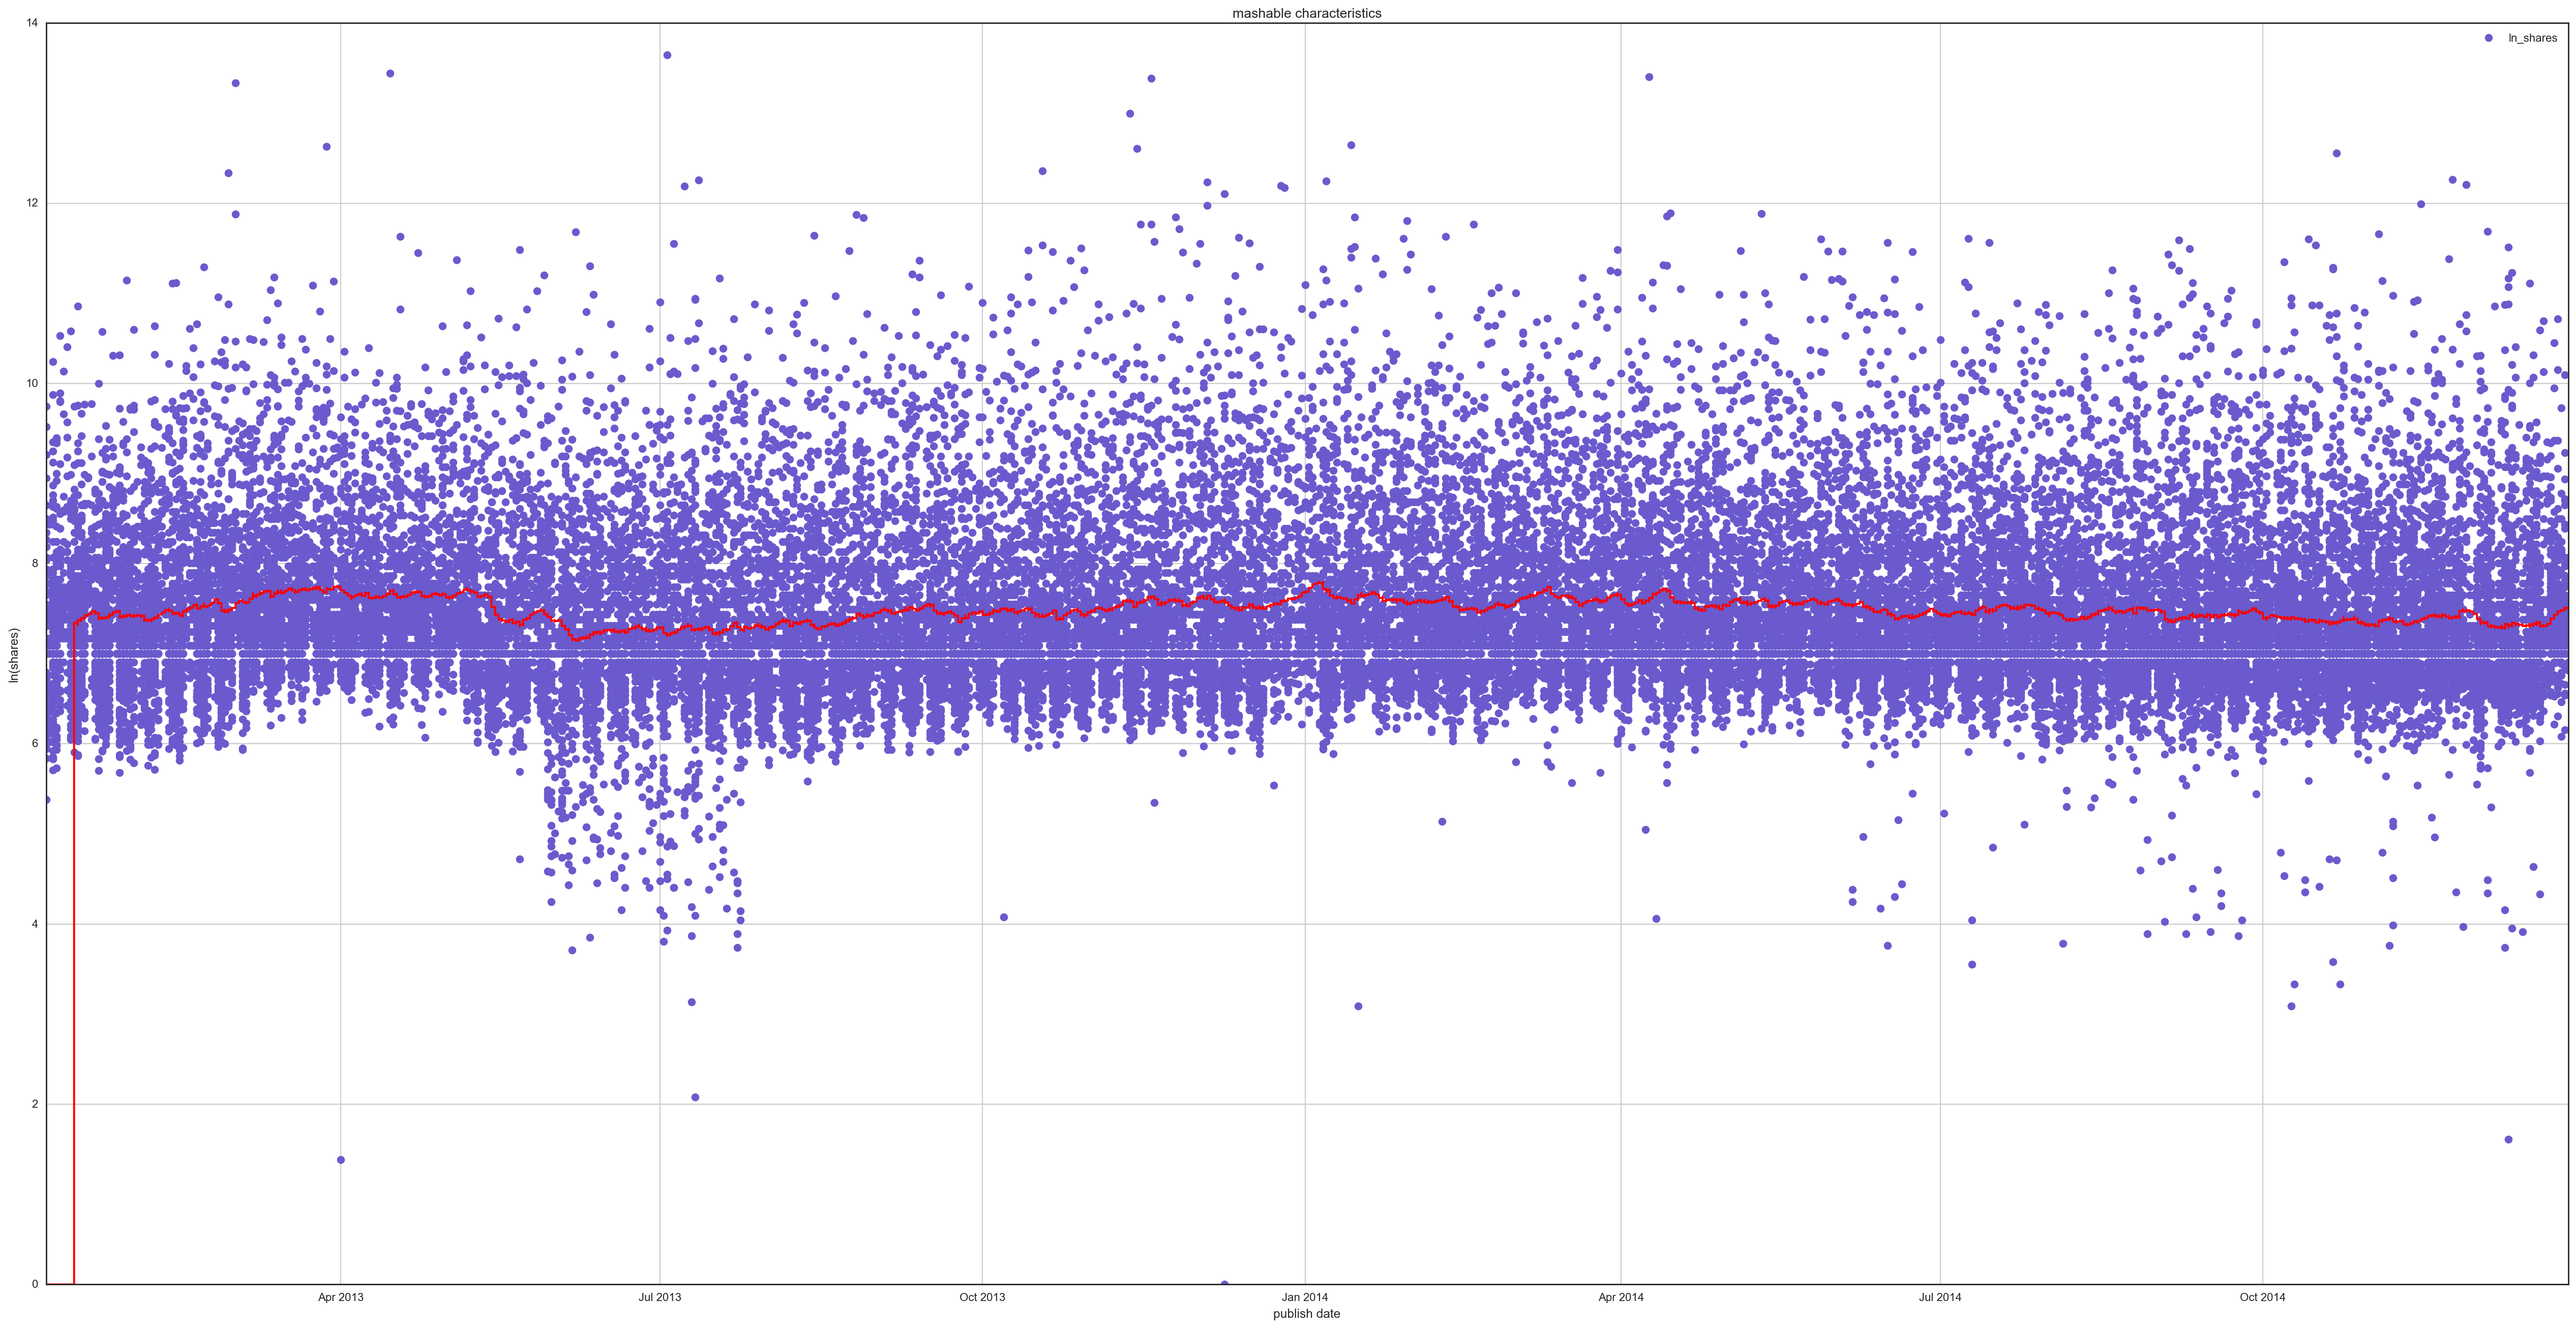

In [97]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... time series plot of shares with moving average
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

import matplotlib.pyplot as plt
matplotlib.pyplot

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "40"

fig=plt.figure(figsize=(40, 20), dpi= 160, facecolor='w', edgecolor='k')

plt.plot(df.publish_date, ln_shares, label = 'ln_shares', linestyle = 'None', marker = 'o', color = 'slateblue')

plt.xlabel('publish date')
plt.ylabel('ln(shares)')
plt.title('mashable characteristics')
plt.legend()

plt.plot(df.publish_date, mvg_avg, label = '100 pt moving average', linestyle = '-', marker = 'None', color = 'red')

plt.grid()

plt.show()